<a href="https://colab.research.google.com/github/jhonatanlang/DSP2/blob/master/Activity_7/Atividade_7_DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 7: Transformada Discreta de Fourier (DFT)

## Efeito da resolução (número de bins)

**1. Use os códigos de aulas anteriores (`tonegen`, por exemplo) para gerar um sinal que consiste na soma de duas senoides de 400Hz e 820 Hz, amostradas com uma frequência de 4 kHz. Depois, use a função `fft` para calcular os coeficientes $X(k)$ da DFT, com N=100. Apresente o código e faça o gráfico da magnitude da FFT.**

In [0]:
import numpy as np # para usar funções que lidam com vetores
import matplotlib.pyplot as plt # para desenho

# função geradora de tons; 
def tonegen(freq, duration, A, fs):
    t = np.linspace(0., duration, int(fs * duration))
    x = A*np.sin(freq * 2. * np.pi * t)
    return x

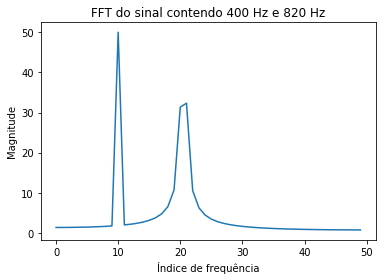

In [0]:
t = 0.5
A = 1
fs = 4000
N = 100
sinal = tonegen(400, t, A, fs) + tonegen(820, t, A, fs)
fft_sinal = np.fft.fft(sinal, N)
plt.plot(np.abs(fft_sinal)[0:int(N/2)])
plt.title("FFT do sinal contendo 400 Hz e 820 Hz")
plt.ylabel('Magnitude')
plt.xlabel('Índice de frequência')
plt.show()

**Responda:**

**a. Qual a resolução em frequência neste caso?**

Sendo $f_s$ a frequência de amostragem e $N$ o número de pontos da FFT, a resolução $R$ pode ser dada por:

$R=\frac{f_s}{N}=\frac{4000}{100}=40\ Hz$

**b. Quais índices de frequência correspondem às senoides de frequências 400 Hz e 820 Hz?**

Sendo $f_a$ a frequência amostrada e $R$ a resolução em frequência, o índice é dado por $I=\frac{f_a}{R}$:

$I_{400}=\frac{400}{40}=10$

$I_{820}=\frac{820}{40}=20.5$

**c & d. Como a transformada de Fourier de uma função senoidal é uma função delta, por que não encontramos duas linhas simples no gráfico da FFT? Experimente usar a função stem no lugar de plot. Por que o espectro da senoide de 820 Hz sofreu espalhamento?**

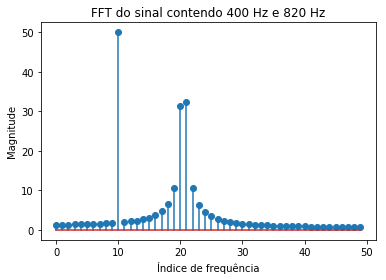

In [0]:
plt.stem(np.abs(fft_sinal)[0:int(N/2)])
plt.title("FFT do sinal contendo 400 Hz e 820 Hz")
plt.ylabel('Magnitude')
plt.xlabel('Índice de frequência')
plt.show()

A frequência amostrada de $820\ Hz$ não possui índice de frequência inteiro, portanto ela sofre espalhamento na FFT.

Outra razão para não termos duas funções delta perfeitas é que não temos resolução espectral infinita, então mesmo que ambas as frequências possuíssem índice inteiro, ainda assim haveria um pouco de amplitude em torno das frequências amostradas. Exemplo no stem abaixo, onde utilizamos frequências de índice $10$ e $20$ ($400\ Hz$ e $800\ Hz$, respectivamente):

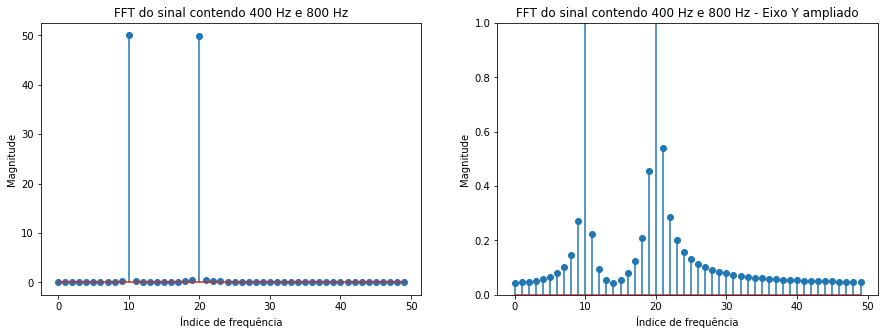

In [0]:
plt.figure(figsize=(15, 5))
sinal_2 = tonegen(400, t, A, fs) + tonegen(800, t, A, fs)
fft_sinal_2 = np.fft.fft(sinal_2, N)
freq_2 = np.fft.fftfreq(fft_sinal_2.shape[-1])
plt.subplot(1, 2, 1)
plt.stem(np.abs(fft_sinal_2)[0:int(N/2)])
plt.title("FFT do sinal contendo 400 Hz e 800 Hz")
plt.ylabel('Magnitude')
plt.xlabel('Índice de frequência')
plt.subplot(1, 2, 2)
plt.stem(np.abs(fft_sinal_2)[0:int(N/2)])
plt.ylim(0, 1)
plt.title("FFT do sinal contendo 400 Hz e 800 Hz - Eixo Y ampliado")
plt.ylabel('Magnitude')
plt.xlabel('Índice de frequência')
plt.show()

**e. Aumente o número de pontos da transformada para N=200. É possível ver somente dois picos agora?**

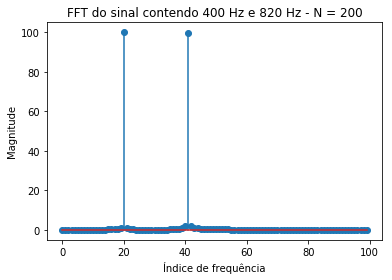

In [0]:
N = 200
fft_sinal = np.fft.fft(sinal, N)
plt.stem(np.abs(fft_sinal)[0:int(N/2)])
plt.title("FFT do sinal contendo 400 Hz e 820 Hz - N = 200")
plt.ylabel('Magnitude')
plt.xlabel('Índice de frequência')
plt.show()

Sim, pois agora a resolução em frequência é $R=\frac{4000}{200}=20\ Hz$, fazendo com que os índice de frequência agora sejam:

$I_{400}=\frac{400}{20}=20$

$I_{820}=\frac{820}{20}=41$

Sendo assim, agora ambos os índices são inteiros e não ocorre espalhamento espectral devido a isso.

**f. Gere um novo sinal que consiste na soma de duas senoides de 400Hz e 420 Hz, com a mesma  frequência de amostragem de 4 kHz Verifique os resultados com transformadas de 100 e 200 pontos. Você consegue ver os dois componentes de frequência separados? Por quê?**

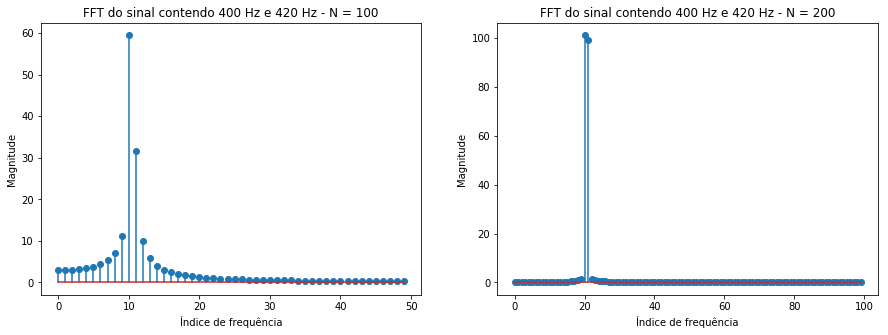

In [0]:
sinal_3 = tonegen(400, t, A, fs) + tonegen(420, t, A, fs)

plt.figure(figsize=(15, 5))

N = 100
fft_sinal_3 = np.fft.fft(sinal_3, N)
plt.subplot(1, 2, 1)
plt.stem(np.abs(fft_sinal_3)[0:int(N/2)])
plt.title("FFT do sinal contendo 400 Hz e 420 Hz - N = 100")
plt.ylabel('Magnitude')
plt.xlabel('Índice de frequência')

N = 200
fft_sinal_3 = np.fft.fft(sinal_3, N)
plt.subplot(1, 2, 2)
plt.stem(np.abs(fft_sinal_3)[0:int(N/2)])
plt.title("FFT do sinal contendo 400 Hz e 420 Hz - N = 200")
plt.ylabel('Magnitude')
plt.xlabel('Índice de frequência')
plt.show()

Só é possível ver as duas frequências separadas no caso onde a FFT tem 200 pontos, pois no caso de 100 pontos não há resolução em frequência suficiente.

## Janelamento

**2. O programa a seguir modifica o exercício anterior para aplicar janelamento na senoide, a fim de minimizar o vazamento espectral (spectral leakage) observado anteriormente. Quando se calcula o espectro dos sinais com uma janela retangular e uma janela Kaiser, observa-se que esta última tem o poder de reduzir o vazamento espectral da senoide de 820 Hz, ao custo de alargar o pico da senoide de 400 Hz. Observe o resultado deste programa.**

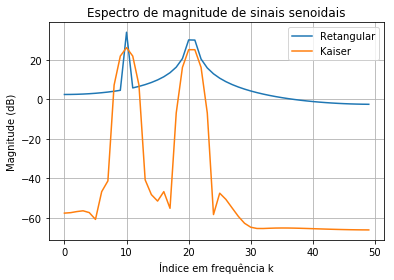

In [212]:
#  Análise espectral de sinusoides usando janelas retangular e Kaiser
#  Baseado no livro "Embedded Signal Processing with the Micro Signal Architecture"
#    de Woon-Seng Gan and Sen M. Kuo
#
# Fernando S. Pacheco - IFSC - 2019

import numpy as np
import scipy.signal as sig
import scipy.fftpack as fftp
import matplotlib.pyplot as plt

f1 = 400 # parâmetros do sinal
f2 = 820
fs = 4000 

N = 100 # tamanho do sinal e da transformada em número de amostras
n = np.array(range(0,N))

x1n = np.sin(2*np.pi*f1*n/fs) # geração do sinal
x2n = np.sin(2*np.pi*f2*n/fs)

# Janelamento
xn_rec = x1n+x2n # Janela retangular: simplesmente somar os sinais individuais
beta = 8.96
wn = sig.kaiser(N,beta) # janela Kaiser
xn_kai = xn_rec*wn

# Espectro
Xk_rec = fftp.fft(xn_rec) # cálculo da transformada (DFT)
absXk_rec=20*np.log10(np.abs(Xk_rec)) # espectro de magnitude (dB)
Xk_kai = fftp.fft(xn_kai)
absXk_kai=20*np.log10(np.abs(Xk_kai))

# Gráfico de magnitude
plt.plot(absXk_rec[0:int(N/2)], label = 'Retangular')
plt.plot(absXk_kai[0:int(N/2)], label = 'Kaiser')

plt.grid(True)
plt.title('Espectro de magnitude de sinais senoidais')
plt.xlabel('Índice em frequência k')
plt.ylabel('Magnitude (dB)')
plt.legend()

**Depois, modifique-o para:**

**a. Aplicar diferentes janelas. Observe as diferenças quanto ao vazamento espectral e à largura do lóbulo principal. Mostre os gráficos e comente os resultados.**



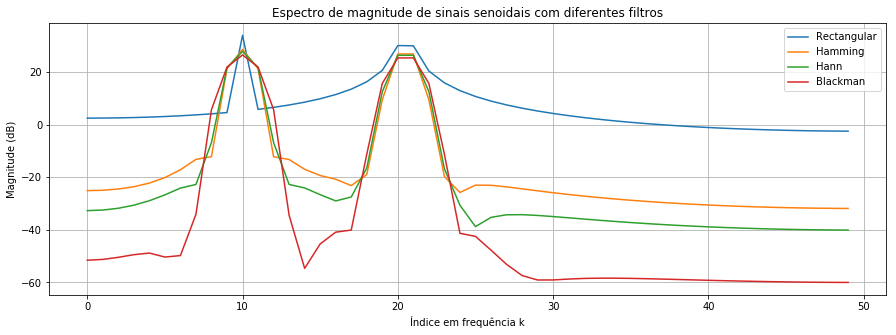

In [213]:
plt.figure(figsize=(15, 5))

Beta = [0, 5, 6, 8.3]
filters_name = ['Rectangular', 'Hamming', 'Hann', 'Blackman']

#beta	Window shape
#0	    Rectangular
#5	    Similar to a Hamming
#6	    Similar to a Hann
#8.6    Similar to a Blackman


for b in range(0,4,1):
    # Janelamento
    wn = sig.kaiser(N,Beta[b]) # janela Kaiser
    xn_kai = xn_rec*wn

    # Espectro
    Xk_kai = fftp.fft(xn_kai)
    absXk_kai=20*np.log10(np.abs(Xk_kai))

    # Gráfico de magnitude
    plt.plot(absXk_kai[0:int(N/2)], label = filters_name[b] )
    
#wn_black = sig.blackman(N)
#xn_black = xn_rec*wn
#Xk_black = fftp.fft(xn_black)
#absXk_black=20*np.log10(np.abs(Xk_black))
#plt.plot(absXk_black[0:int(N/2)], label = 'filters_blackman')

plt.grid(True)
plt.title('Espectro de magnitude de sinais senoidais com diferentes filtros')
plt.xlabel('Índice em frequência k')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

No gráfico acima podemos ver diferentes janelas aplicadas ao sinal que possui as frequências de $400 Hz$ e $820 Hz$. Neste código os filtros Retangular, Hamming, Hamm e Blackman foram simulados utilizando o filtro Kaiser com os valores corretos de beta para isso. Pode-se observar que janelas que possuim melhor características de atenuação em relação as frequências fora das desejadas perdem em espalhamento espectral.

**b. Aplicar a janela de Kaiser com diferentes valores de beta. Apresente os gráficos e analise os resultados.**

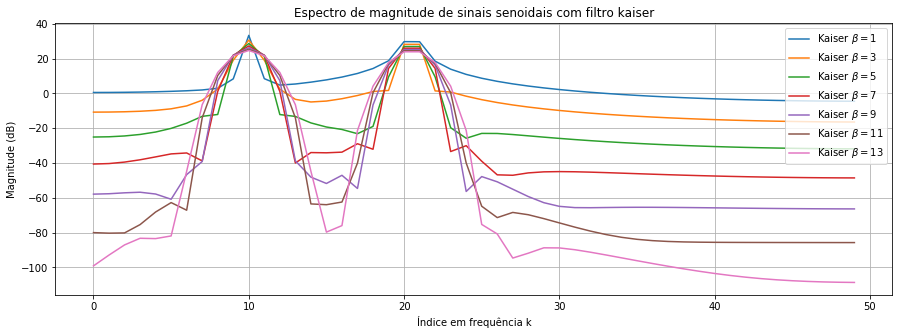

In [194]:
plt.figure(figsize=(15, 5))

for beta in range(1,15,2):
    # Janelamento
    wn = sig.kaiser(N,beta) # janela Kaiser
    xn_kai = xn_rec*wn

    # Espectro
    Xk_kai = fftp.fft(xn_kai)
    absXk_kai=20*np.log10(np.abs(Xk_kai))

    # Gráfico de magnitude
    plt.plot(absXk_kai[0:int(N/2)], label = 'Kaiser $\\beta=$' + str(beta))

plt.grid(True)
plt.title('Espectro de magnitude de sinais senoidais com filtro kaiser')
plt.xlabel('Índice em frequência k')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

O valor do coeficiente beta altera o janelamento de uma forma não exatamente linear, mas pode-se perceber que o quão maior é o coeficiente, maior é a atenuação dos indices de frequências que não pertencem ao sinal, porem também aumenta a largura dos lóbulos.



